In [31]:
# import importants
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
with open('pickled_df_cleaned', 'rb') as f:
    df_0 = pickle.load(f)

In [3]:
df_0.info()

In [4]:
df_0.describe()

,Price,Power_W,RAM_GB,SSD_GB,HDD_GB,Processor_GHz,L3_Cache_MB,Memory_Capacity_GB,Release_Date,acer,...,not_listed,optiplex,pricerightcomputers,skytech,tsingtongfang,velocitymicro,velztorm,viprtech,xoticpc,yeyian
count,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,...,1136.000000,1136.000000,1136.000000,1136.000000,1136.00000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000
mean,1720.049692,355.338908,13.069542,821.554577,1015.869718,3.285572,15.696303,20.852113,2021.634683,0.003521,...,0.073944,0.005282,0.004401,0.001761,0.00088,0.002641,0.160211,0.002641,0.015845,0.004401
std,1064.714708,288.083894,11.175946,681.956079,1711.626555,0.482674,9.950725,17.084170,0.626432,0.059261,...,0.261794,0.072515,0.066226,0.041941,0.02967,0.051344,0.366963,0.051344,0.124931,0.066226
min,112.950000,0.000000,4.000000,0.000000,0.000000,2.100000,3.000000,4.000000,2017.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,929.000000,180.000000,8.000000,500.000000,0.000000,2.900000,12.000000,16.000000,2021.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1349.000000,260.000000,8.000000,512.000000,0.000000,3.400000,12.000000,16.000000,2022.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2449.990000,650.000000,16.000000,1000.000000,1000.000000,3.700000,16.000000,32.000000,2022.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11693.000000,2000.000000,64.000000,4000.000000,10000.000000,4.100000,64.000000,128.000000,2022.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df_0.corr()

,Price,Power_W,RAM_GB,SSD_GB,HDD_GB,Processor_GHz,L3_Cache_MB,Memory_Capacity_GB,Release_Date,acer,...,not_listed,optiplex,pricerightcomputers,skytech,tsingtongfang,velocitymicro,velztorm,viprtech,xoticpc,yeyian
Price,1.000000,0.321906,-0.100496,0.271919,0.538341,0.116381,0.364654,0.376225,-0.065556,-0.048807,...,-0.159665,-0.093293,-0.008578,0.058400,-0.034056,0.041450,0.352669,-0.033307,0.122376,-0.018696
Power_W,0.321906,1.000000,-0.081146,-0.037852,-0.135093,0.117832,0.559233,-0.094998,0.177347,-0.019165,...,-0.330004,-0.089919,0.056493,0.057558,-0.036628,0.052655,0.590295,-0.063498,0.061296,0.061111
RAM_GB,-0.100496,-0.081146,1.000000,0.172969,0.011773,-0.213461,-0.133646,0.450047,-0.011596,-0.037619,...,-0.108963,-0.033068,-0.006366,-0.034096,-0.013470,-0.023352,-0.198215,-0.023352,-0.103017,-0.044458
SSD_GB,0.271919,-0.037852,0.172969,1.000000,0.282607,-0.023047,0.026368,0.326280,-0.063219,-0.038157,...,-0.080986,-0.078701,-0.031755,0.010994,-0.013480,0.031085,-0.087407,-0.062018,-0.034002,-0.011622
HDD_GB,0.538341,-0.135093,0.011773,0.282607,1.000000,0.041871,-0.057938,0.463844,-0.178265,-0.026610,...,-0.124527,0.002873,0.014928,-0.024936,-0.008742,-0.030554,-0.012468,-0.000477,0.031785,-0.023935
Processor_GHz,0.116381,0.117832,-0.213461,-0.023047,0.041871,1.000000,0.147520,-0.044075,0.060675,0.051061,...,-0.064134,-0.002855,0.032307,0.036074,0.019345,0.037091,0.151346,0.033535,0.114838,0.057114
L3_Cache_MB,0.364654,0.559233,-0.133646,0.026368,-0.057938,0.147520,1.000000,-0.026504,0.094837,-0.054961,...,-0.103658,-0.027079,-0.024709,0.068838,0.144151,-0.019123,0.599171,-0.019123,-0.047154,0.007378
Memory_Capacity_GB,0.376225,-0.094998,0.450047,0.326280,0.463844,-0.044075,-0.026504,1.000000,-0.155956,-0.037776,...,-0.060590,-0.043462,-0.025122,-0.011933,-0.022340,0.017521,-0.101619,-0.038727,0.010180,-0.031352
Release_Date,-0.065556,0.177347,-0.011596,-0.063219,-0.178265,0.060675,0.094837,-0.155956,1.000000,-0.012786,...,0.121882,0.003722,-0.088632,-0.009033,-0.030087,-0.079551,0.250996,0.030022,0.074029,-0.024920
acer,-0.048807,-0.019165,-0.037619,-0.038157,-0.026610,0.051061,-0.054961,-0.037776,-0.012786,1.000000,...,-0.016797,-0.004332,-0.003952,-0.002496,-0.001764,-0.003059,-0.025964,-0.003059,-0.007543,-0.003952


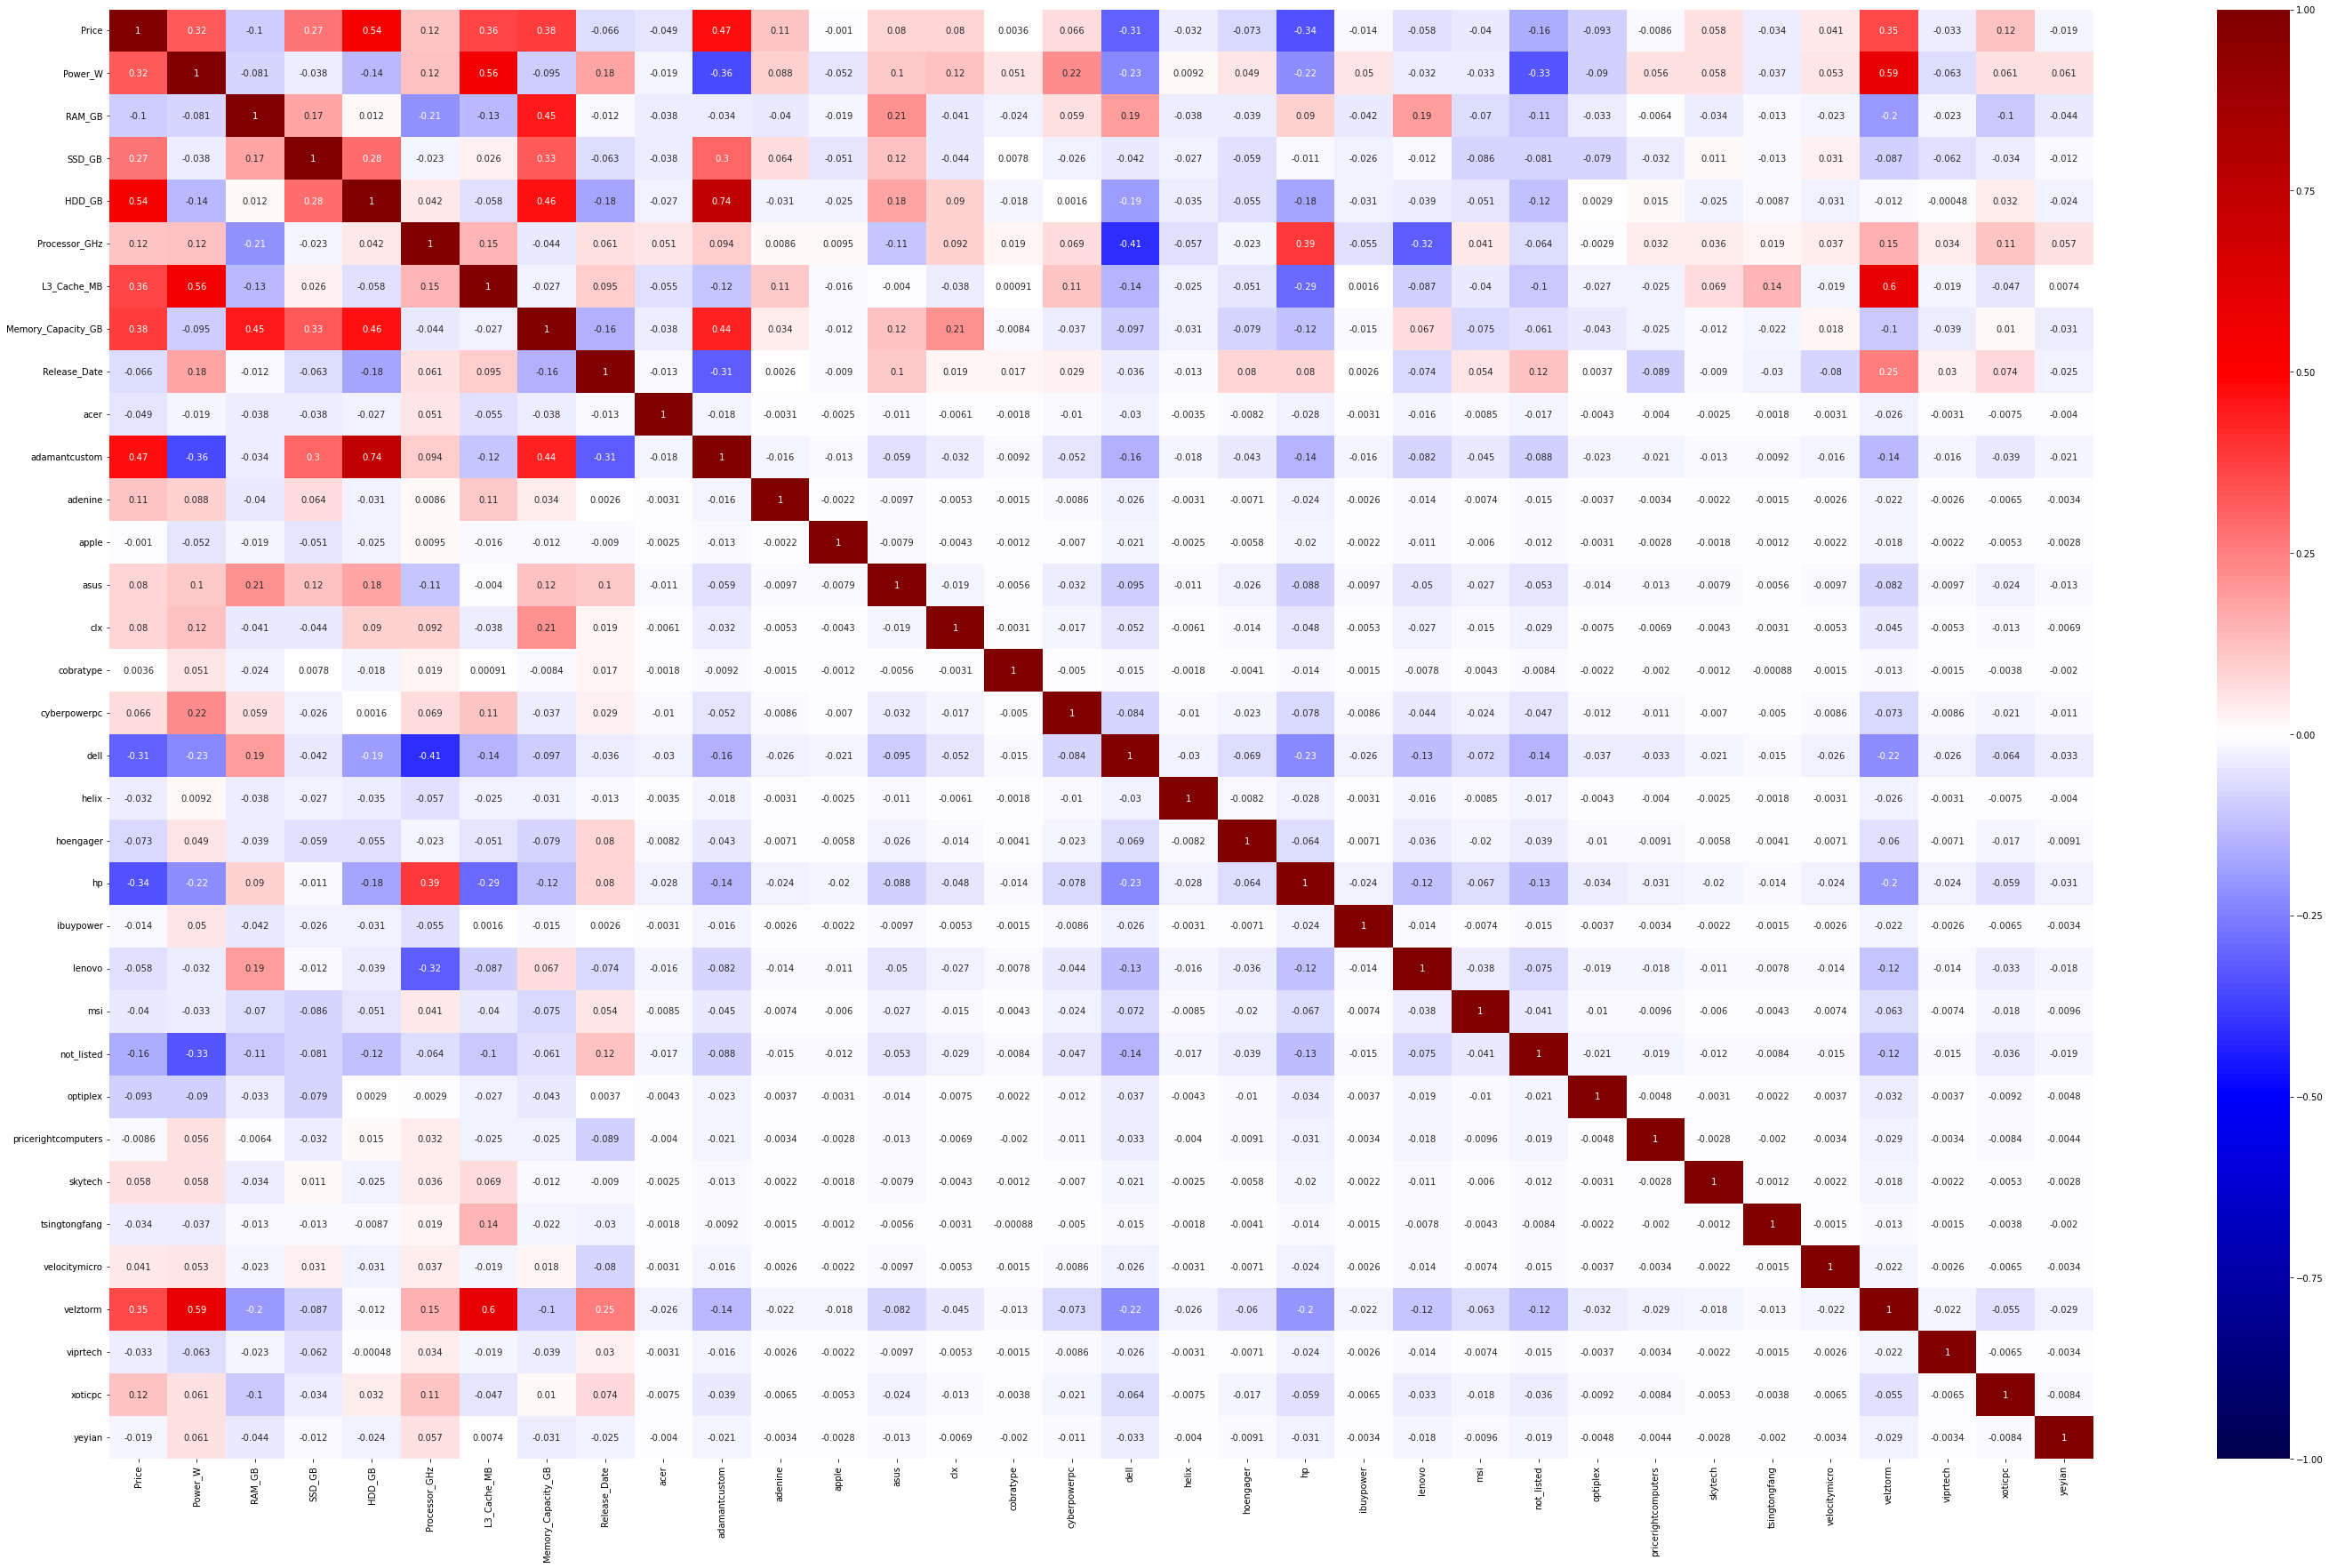

In [39]:
rcParams['figure.figsize'] = 50,30
heatmap = sns.heatmap(df_0.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
plt.savefig('heatmap')

In [7]:
# sns.pairplot(df_0, height=1.2, aspect=1.5);

In [8]:
# using full dataset

X0 = df_0.drop(columns = 'Price')
X0 = sm.add_constant(X0)
Y0 = df_0.loc[:, 'Price']

computer_model = sm.OLS(Y0, X0, data=df_0)
results0 = computer_model.fit()
results0.summary()

C:\Users\mitch\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     58.39
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          7.82e-216
Time:                        12:23:22   Log-Likelihood:                -8955.6
No. Observations:                1136   AIC:                         1.798e+04
Df Residuals:                    1102   BIC:                         1.815e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -8.639e+04   7.51e+04     -1.150      0.251   -2.34e+05    6.11e+04
Power_W                 0.6189      0.153      4.034      0.000       0.318       0.920
RAM_GB                 -5.2605      2.439     -2.156      0.031     -10.047      -0.474
SSD_GB                  0.1243      0.032      3.891      0.000       0.062       0.187
HDD_GB                  0.1343      0.020      6.807      0.000       0.096       0.173
Processor_GHz         -34.0023     55.083     -0.617      0.537    -142.081      74.076
L3_Cache_MB            13.2468      2.842      4.661      0.000       7.671      18.823
Memory_Capacity_GB      8.6086      1.687      5.103      0.000       5.298      11.919
Release_Date           43.3284     37.193      1.165      0.244     -29.648     116.305
acer                 -615.3126    343.650     -1.791      0.074   -1289.594      58.969
adamantcustom         896.0379    175.968      5.092      0.000     550.767    1241.309
adenine              1482.7189    388.229      3.819      0.000     720.967    2244.471
apple                 352.3071    479.229      0.735      0.462    -587.997    1292.611
asus                 -125.3974    152.967     -0.820      0.413    -425.536     174.741
clx                    32.0210    219.884      0.146      0.884    -399.418     463.460
cobratype            -231.2027    657.849     -0.351      0.725   -1521.982    1059.576
cyberpowerpc            5.6307    147.020      0.038      0.969    -282.841     294.102
dell                 -550.1164    120.230     -4.576      0.000    -786.022    -314.211
helix                -494.6594    338.717     -1.460      0.144   -1159.262     169.943
hoengager            -559.2149    171.547     -3.260      0.001    -895.810    -222.620
hp                   -609.6433    125.960     -4.840      0.000    -856.791    -362.496
ibuypower            -466.3918    385.816     -1.209      0.227   -1223.408     290.624
lenovo               -290.8805    130.529     -2.228      0.026    -546.993     -34.768
msi                  -195.3111    172.110     -1.135      0.257    -533.011     142.389
not_listed           -380.0771    149.592     -2.541      0.011    -673.595     -86.559
optiplex            -1106.4546    299.535     -3.694      0.000   -1694.178    -518.732
pricerightcomputers  -311.0118    304.480     -1.021      0.307    -908.438     286.415
skytech               993.8010    468.512      2.121      0.034      74.524    1913.078
tsingtongfang       -1566.8802    679.293     -2.307      0.021   -2899.735    -234.026
velocitymicro         632.0347    385.306      1.640      0.101    -123.982    1388.052
velztorm              304.6719    102.649      2.968      0.003     103.263     506.080
viprtech             -391.1098    403.189     -0.970      0.332   -1182.215     399.995
xot

<AxesSubplot:>

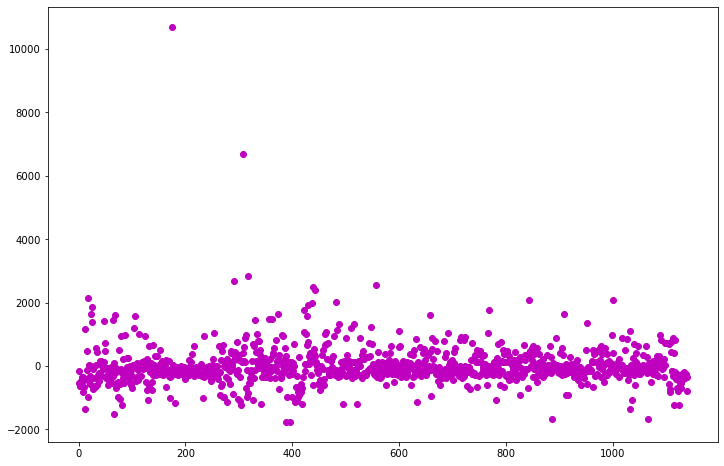

In [33]:
resid_0 = results0.resid.plot(style='o', figsize=(12,8), color = 'm')
plt.savefig('resid_0')
resid_0

In [10]:
with open('pickled_X0', 'wb') as f:
    pickle.dump(X0,f)
    
with open('pickled_Y0', 'wb') as f:
    pickle.dump(Y0,f)

In [11]:
# drop outlier rows

z_scores = stats.zscore(df_0)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_1 = df_0[filtered_entries]

In [12]:
# using cleaned dataset

X1 = df_1.drop(columns = 'Price')
X1 = sm.add_constant(X1)
Y1 = df_1.loc[:, 'Price']

computer_model = sm.OLS(Y1, X1, data=df_1)
results1 = computer_model.fit()
results1.summary()

C:\Users\mitch\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     233.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.93e-215
Time:                        12:23:23   Log-Likelihood:                -4771.2
No. Observations:                 651   AIC:                             9566.
Df Residuals:                     639   BIC:                             9620.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.144e+05   6.15e+04     -1.861      0.063   -2.35e+05    6302.306
Power_W                 0.5187      0.162      3.193      0.001       0.200       0.838
RAM_GB                -36.9737      3.699     -9.997      0.000     -44.237     -29.711
SSD_GB                  0.1435      0.026      5.416      0.000       0.091       0.196
HDD_GB                  0.0283      0.019      1.478      0.140      -0.009       0.066
Processor_GHz        -127.4237     38.492     -3.310      0.001    -203.011     -51.837
L3_Cache_MB            17.2570      2.760      6.252      0.000      11.837      22.677
Memory_Capacity_GB     40.8151      3.475     11.744      0.000      33.991      47.640
Release_Date           57.1234     30.426      1.877      0.061      -2.623     116.870
acer                 1.417e-13   7.63e-14      1.858      0.064   -8.05e-15    2.92e-13
adamantcustom       -1.323e-13   2.05e-14     -6.457      0.000   -1.73e-13   -9.21e-14
adenine                      0          0        nan        nan           0           0
apple                        0          0        nan        nan           0           0
asus                         0          0        nan        nan           0           0
clx                          0          0        nan        nan           0           0
cobratype                    0          0        nan        nan           0           0
cyberpowerpc                 0          0        nan        nan           0           0
dell                 -239.1203    102.454     -2.334      0.020    -440.308     -37.933
helix                        0          0        nan        nan           0           0
hoengager                    0          0        nan        nan           0           0
hp                   -165.5748    103.343     -1.602      0.110    -368.508      37.359
ibuypower                    0          0        nan        nan           0           0
lenovo                       0          0        nan        nan           0           0
msi                          0          0        nan        nan           0           0
not_listed                   0          0        nan        nan           0           0
optiplex                     0          0        nan        nan           0           0
pricerightcomputers          0          0        nan        nan           0           0
skytech                      0          0        nan        nan           0           0
tsingtongfang                0          0        nan        nan           0           0
velocitymicro                0          0        nan        nan           0           0
velztorm              569.0210     68.262      8.336      0.000     434.976     703.066
viprtech                     0          0        nan        nan           0           0
xot

<AxesSubplot:>

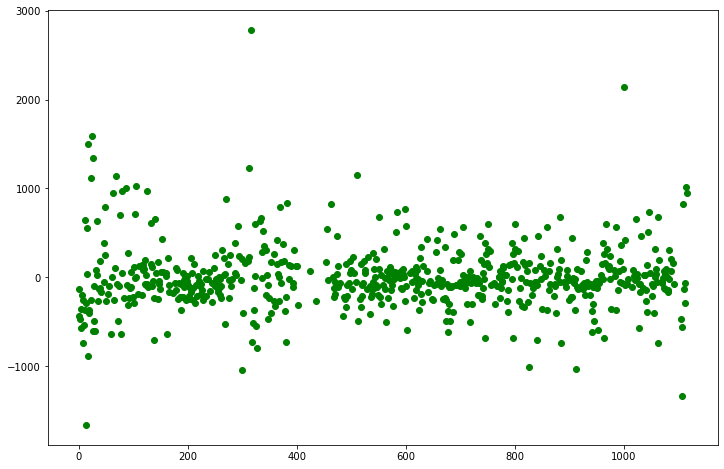

In [34]:
resid_1 = results1.resid.plot(style='o', figsize=(12,8), color = 'g')
plt.savefig('resid_1')
resid_1

In [14]:
with open('pickled_X1', 'wb') as f:
    pickle.dump(X1,f)
    
with open('pickled_Y1', 'wb') as f:
    pickle.dump(Y1,f)

In [15]:
# L3 and Memory bore high colinearity

X2 = df_1.drop(columns = ['Price', 'L3_Cache_MB', 'Memory_Capacity_GB'])
X2 = sm.add_constant(X2)
Y2 = df_1.loc[:, 'Price']

computer_model = sm.OLS(Y2, X2, data=df_1)
results2 = computer_model.fit()
results2.summary()

C:\Users\mitch\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.09e-177
Time:                        12:23:23   Log-Likelihood:                -4865.6
No. Observations:                 651   AIC:                             9751.
Df Residuals:                     641   BIC:                             9796.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.012e+04   7.07e+04     -1.275      0.203   -2.29e+05    4.87e+04
Power_W                 0.6724      0.181      3.716      0.000       0.317       1.028
RAM_GB                  0.5284      2.201      0.240      0.810      -3.795       4.851
SSD_GB                  0.2059      0.030      6.822      0.000       0.147       0.265
HDD_GB                  0.0612      0.022      2.822      0.005       0.019       0.104
Processor_GHz         -66.8103     43.431     -1.538      0.124    -152.094      18.474
Release_Date           45.3660     34.980      1.297      0.195     -23.323     114.055
acer                  1.09e-13   1.64e-14      6.637      0.000    7.68e-14    1.41e-13
adamantcustom        5.424e-14   8.86e-15      6.120      0.000    3.68e-14    7.16e-14
adenine                      0          0        nan        nan           0           0
apple                        0          0        nan        nan           0           0
asus                         0          0        nan        nan           0           0
clx                          0          0        nan        nan           0           0
cobratype                    0          0        nan        nan           0           0
cyberpowerpc                 0          0        nan        nan           0           0
dell                 -737.1287    106.601     -6.915      0.000    -946.458    -527.799
helix                        0          0        nan        nan           0           0
hoengager                    0          0        nan        nan           0           0
hp                   -748.6553    108.997     -6.869      0.000    -962.690    -534.620
ibuypower                    0          0        nan        nan           0           0
lenovo                       0          0        nan        nan           0           0
msi                          0          0        nan        nan           0           0
not_listed                   0          0        nan        nan           0           0
optiplex                     0          0        nan        nan           0           0
pricerightcomputers          0          0        nan        nan           0           0
skytech                      0          0        nan        nan           0           0
tsingtongfang                0          0        nan        nan           0           0
velocitymicro                0          0        nan        nan           0           0
velztorm              467.8570     74.666      6.266      0.000     321.238     614.476
viprtech                     0          0        nan        nan           0           0
xoticpc                      0          0        nan        nan           0           0
yeyian                       0          0        nan        nan           0           0
===

<AxesSubplot:>

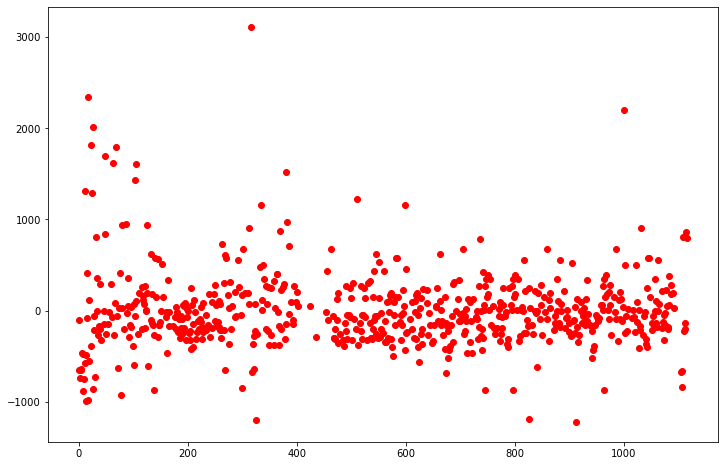

In [35]:
resid_2 = results2.resid.plot(style='o', figsize=(12,8), color = 'r')
plt.savefig('resid_2')
resid_2

In [17]:
with open('pickled_X2', 'wb') as f:
    pickle.dump(X2,f)
    
with open('pickled_Y2', 'wb') as f:
    pickle.dump(Y2,f)

In [19]:
# apply a log function to the Price target

df_1['Price_log'] = df_1['Price'].apply(lambda x: np.log(x))

X3 = df_1.drop(columns = ['Price', 'Price_log', 'L3_Cache_MB', 'Memory_Capacity_GB'])
X3 = sm.add_constant(X3)
Y3 = df_1.loc[:, 'Price_log']

computer_model = sm.OLS(Y3, X3, data=df_1)
results3 = computer_model.fit()
results3.summary()

C:\Users\mitch\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.01e-184
Time:                        12:23:23   Log-Likelihood:                -67.396
No. Observations:                 651   AIC:                             154.8
Df Residuals:                     641   BIC:                             199.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  64.0018     44.496      1.438      0.151     -23.373     151.376
Power_W                 0.0007      0.000      5.777      0.000       0.000       0.001
RAM_GB                  0.0039      0.001      2.811      0.005       0.001       0.007
SSD_GB                  0.0001    1.9e-05      7.715      0.000       0.000       0.000
HDD_GB               3.225e-05   1.37e-05      2.362      0.018    5.44e-06    5.91e-05
Processor_GHz          -0.1152      0.027     -4.212      0.000      -0.169      -0.061
Release_Date           -0.0281      0.022     -1.274      0.203      -0.071       0.015
acer                 5.409e-17   1.03e-17      5.230      0.000    3.38e-17    7.44e-17
adamantcustom        3.367e-17   5.58e-18      6.035      0.000    2.27e-17    4.46e-17
adenine                      0          0        nan        nan           0           0
apple                        0          0        nan        nan           0           0
asus                         0          0        nan        nan           0           0
clx                          0          0        nan        nan           0           0
cobratype                    0          0        nan        nan           0           0
cyberpowerpc                 0          0        nan        nan           0           0
dell                   -0.3824      0.067     -5.698      0.000      -0.514      -0.251
helix                        0          0        nan        nan           0           0
hoengager                    0          0        nan        nan           0           0
hp                     -0.3874      0.069     -5.645      0.000      -0.522      -0.253
ibuypower                    0          0        nan        nan           0           0
lenovo                       0          0        nan        nan           0           0
msi                          0          0        nan        nan           0           0
not_listed                   0          0        nan        nan           0           0
optiplex                     0          0        nan        nan           0           0
pricerightcomputers          0          0        nan        nan           0           0
skytech                      0          0        nan        nan           0           0
tsingtongfang                0          0        nan        nan           0           0
velocitymicro                0          0        nan        nan           0           0
velztorm                0.3206      0.047      6.820      0.000       0.228       0.413
viprtech                     0          0        nan        nan           0           0
xoticpc                      0          0        nan        nan           0           0
yeyian                       0          0        nan        nan           0           0
===

<AxesSubplot:>

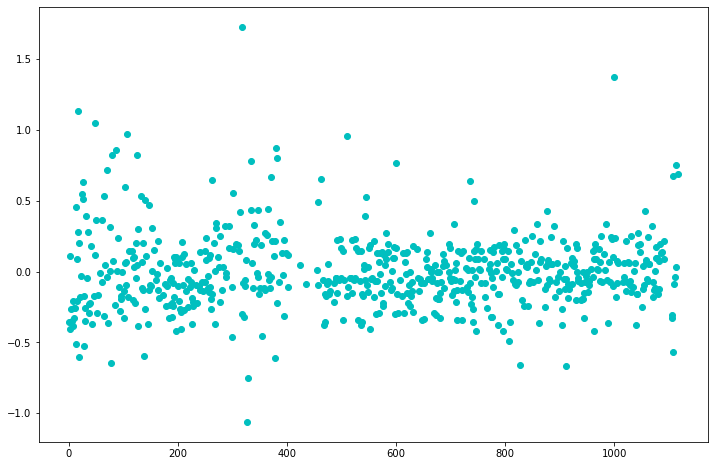

In [36]:
resid_3 = results3.resid.plot(style='o', figsize=(12,8), color = 'c')
plt.savefig('resid_3')
resid_3

In [21]:
with open('pickled_X3', 'wb') as f:
    pickle.dump(X3,f)
    
with open('pickled_Y3', 'wb') as f:
    pickle.dump(Y3,f)

In [22]:
# Removed Released_Date for having the highest P value

X4 = df_1.drop(columns = ['Price', 'Price_log', 'L3_Cache_MB', 'Memory_Capacity_GB', 'Release_Date'])
X4 = sm.add_constant(X4)
Y4 = df_1.loc[:, 'Price_log']

computer_model = sm.OLS(Y4, X4, data=df_1)
results4 = computer_model.fit()
results4.summary()

C:\Users\mitch\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     235.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          4.26e-185
Time:                        12:23:23   Log-Likelihood:                -68.220
No. Observations:                 651   AIC:                             154.4
Df Residuals:                     642   BIC:                             194.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.3002      0.115     63.614      0.000       7.075       7.526
Power_W                 0.0006      0.000      5.675      0.000       0.000       0.001
RAM_GB                  0.0039      0.001      2.796      0.005       0.001       0.007
SSD_GB                  0.0001    1.9e-05      7.655      0.000       0.000       0.000
HDD_GB               3.222e-05   1.37e-05      2.359      0.019     5.4e-06     5.9e-05
Processor_GHz          -0.1173      0.027     -4.294      0.000      -0.171      -0.064
acer                  9.47e-17    3.9e-17      2.425      0.016     1.8e-17    1.71e-16
adamantcustom        1.058e-16   1.91e-17      5.543      0.000    6.83e-17    1.43e-16
adenine                      0          0        nan        nan           0           0
apple                        0          0        nan        nan           0           0
asus                         0          0        nan        nan           0           0
clx                          0          0        nan        nan           0           0
cobratype                    0          0        nan        nan           0           0
cyberpowerpc                 0          0        nan        nan           0           0
dell                   -0.4080      0.064     -6.369      0.000      -0.534      -0.282
helix                        0          0        nan        nan           0           0
hoengager                    0          0        nan        nan           0           0
hp                     -0.4124      0.066     -6.270      0.000      -0.542      -0.283
ibuypower                    0          0        nan        nan           0           0
lenovo                       0          0        nan        nan           0           0
msi                          0          0        nan        nan           0           0
not_listed                   0          0        nan        nan           0           0
optiplex                     0          0        nan        nan           0           0
pricerightcomputers          0          0        nan        nan           0           0
skytech                      0          0        nan        nan           0           0
tsingtongfang                0          0        nan        nan           0           0
velocitymicro                0          0        nan        nan           0           0
velztorm                0.2956      0.043      6.916      0.000       0.212       0.379
viprtech                     0          0        nan        nan           0           0
xoticpc                      0          0        nan        nan           0           0
yeyian                       0          0        nan        nan           0           0
==============================================================================
Omnibus:    

<AxesSubplot:>

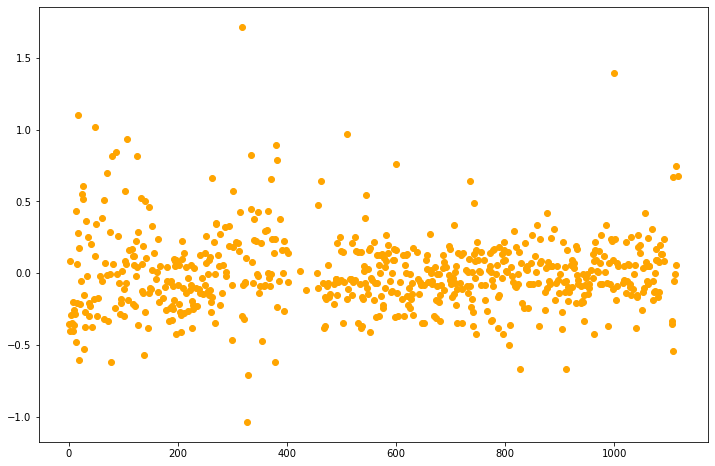

In [37]:
resid_4 = results4.resid.plot(style='o', figsize=(12,8), color = 'orange')
plt.savefig('resid_4')
resid_4

In [24]:
with open('pickled_X4', 'wb') as f:
    pickle.dump(X4,f)
    
with open('pickled_Y4', 'wb') as f:
    pickle.dump(Y4,f)

In [25]:
sns.pairplot(df_1, height=3, aspect=3);

In [26]:
# made Power_W and RAM_GB polynomials

X5 = df_1.drop(columns = ['Price', 'Price_log', 'L3_Cache_MB', 'Memory_Capacity_GB', 'Release_Date'])
X5['Power^2'] = X5['Power_W'] * X5['Power_W']
X5['RAM^2'] = X5['RAM_GB'] * X5['RAM_GB']
X5 = X5.drop(columns = ['Power_W', 'RAM_GB'])
X5 = sm.add_constant(X5)
Y5 = df_1.loc[:, 'Price_log']

computer_model = sm.OLS(Y5, X5, data=df_1)
results5 = computer_model.fit()
results5.summary()

C:\Users\mitch\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     268.3
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          4.52e-199
Time:                        12:28:18   Log-Likelihood:                -35.494
No. Observations:                 651   AIC:                             88.99
Df Residuals:                     642   BIC:                             129.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.1688      0.105     68.566      0.000       6.964       7.374
SSD_GB                  0.0001    1.8e-05      7.614      0.000       0.000       0.000
HDD_GB               3.205e-05    1.3e-05      2.472      0.014    6.59e-06    5.75e-05
Processor_GHz          -0.1402      0.026     -5.375      0.000      -0.191      -0.089
acer                -7.643e-15   2.49e-14     -0.308      0.759   -5.65e-14    4.12e-14
adamantcustom         -3.8e-16   2.86e-16     -1.329      0.184   -9.41e-16    1.81e-16
adenine              7.309e-17   1.21e-16      0.603      0.547   -1.65e-16    3.11e-16
apple                -3.28e-17   5.02e-19    -65.320      0.000   -3.38e-17   -3.18e-17
asus                         0          0        nan        nan           0           0
clx                          0          0        nan        nan           0           0
cobratype                    0          0        nan        nan           0           0
cyberpowerpc                 0          0        nan        nan           0           0
dell                   -0.1176      0.067     -1.768      0.077      -0.248       0.013
helix                        0          0        nan        nan           0           0
hoengager                    0          0        nan        nan           0           0
hp                     -0.1111      0.068     -1.623      0.105      -0.245       0.023
ibuypower                    0          0        nan        nan           0           0
lenovo                       0          0        nan        nan           0           0
msi                          0          0        nan        nan           0           0
not_listed                   0          0        nan        nan           0           0
optiplex                     0          0        nan        nan           0           0
pricerightcomputers          0          0        nan        nan           0           0
skytech                      0          0        nan        nan           0           0
tsingtongfang                0          0        nan        nan           0           0
velocitymicro                0          0        nan        nan           0           0
velztorm                0.2109      0.042      5.030      0.000       0.129       0.293
viprtech                     0          0        nan        nan           0           0
xoticpc                      0          0        nan        nan           0           0
yeyian                       0          0        nan        nan           0           0
Power^2              1.447e-06   1.42e-07     10.227      0.000    1.17e-06    1.73e-06
RAM^2                   0.0001   3.27e-05      3.298      0.001    4.36e-05       0.000
==============================================================================
Omnibus:    

<AxesSubplot:>

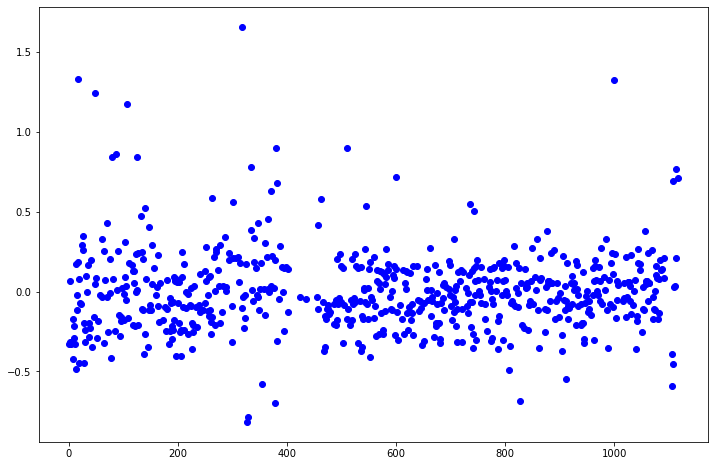

In [38]:
resid_5 = results5.resid.plot(style='o', figsize=(12,8), color = 'b')
plt.savefig('resid_5')
resid_5

In [28]:
with open('pickled_X5', 'wb') as f:
    pickle.dump(X5,f)
    
with open('pickled_Y5', 'wb') as f:
    pickle.dump(Y5,f)

In [29]:
# End of Linear Regression
# Start Step_4 - Data Validation